In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#加载数据
data=sns.load_dataset('iris')

#打印数据信息
print(set(data['species'].values))
print(data.shape)
print(data.head())
print(data['species'].value_counts())

{'setosa', 'versicolor', 'virginica'}
(150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


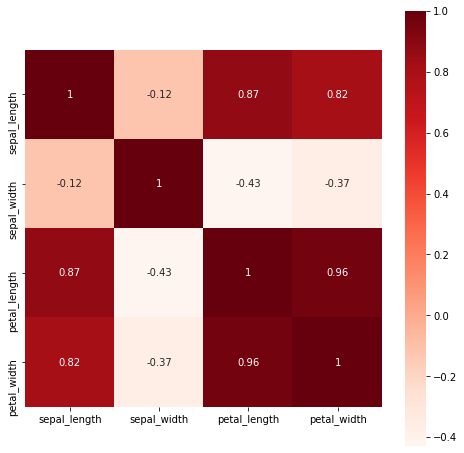

In [53]:
#可视化维度关系
values=data.iloc[:,:4]#取前四列
correlation=values.corr()#列与列之间的相关系数
fig,ax=plt.subplots(figsize=(8,8))

#热力图
sns.heatmap(correlation,annot=True,annot_kws={'size':10},\
            cmap='Reds',square=True,ax=ax);

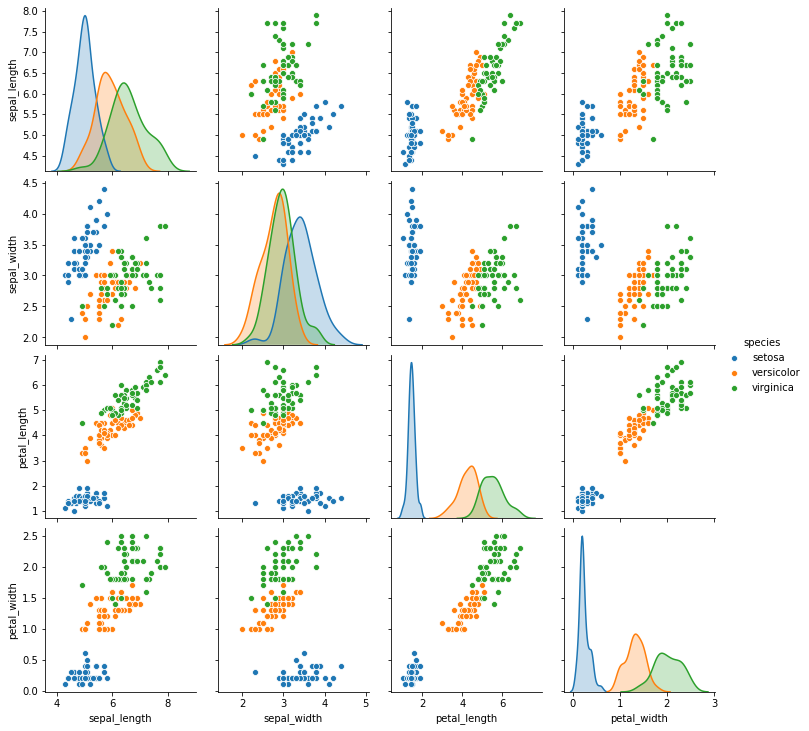

In [20]:
#散点关系图
sns.pairplot(data,hue='species');

explained variance ratio:[0.92461872 0.05306648 0.01710261 0.00521218]


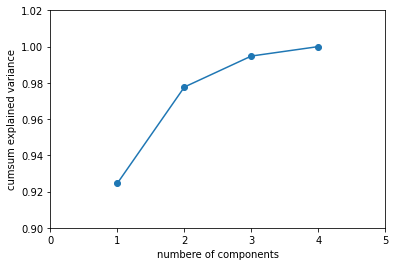

In [58]:
#使用PCA分析数据集（4个主成分）
pca4=PCA(n_components=4)
pc4=pca4.fit_transform(values)

#各个主成分所占的比例
print('explained variance ratio:%s' % pca4.explained_variance_ratio_)

#可视化主成分累加结果
plt.plot(range(1,5),np.cumsum(pca4.explained_variance_ratio_))
plt.scatter(range(1,5),np.cumsum(pca4.explained_variance_ratio_))

plt.xlim(0,5)
plt.ylim(0.9,1.02)

plt.xlabel('numbere of components')
plt.ylabel('cumsum explained variance');

In [59]:
#2个主成分
pca2=PCA(n_components=2)
pc2=pca2.fit_transform(values)
pc2_df=pd.DataFrame(pc2,columns=['pc1','pc2'])
pc2_df['species']=data['species']
pc2_df.head()

,pc1,pc2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


In [60]:
#2个主成分内容
comp=pca2.components_
print(comp)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [61]:
#验证comp[0]·values.iloc[0]是否等于-2.684126
'''
sklearn在进行PCA计算时，数据要进行“中心化”，
即每个数据减去这组数据的平均值，这样做主要是为了后续方便计算。
'''
result=np.dot(comp[0],(values.iloc[0]-values.mean(axis=0)))
print(result)

-2.684125625969537


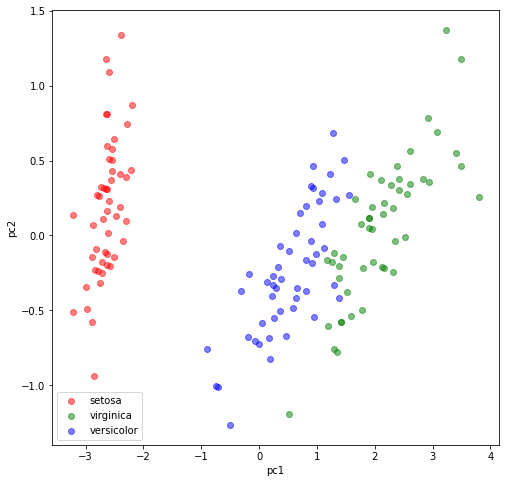

In [62]:
#数据从4维降到2维，绘制二维图

#提取各个物种对应的主成分数据
setosa=pc2_df[pc2_df['species']=='setosa']# print(setosa)
virginica=pc2_df[pc2_df['species']=='virginica']
versicolor=pc2_df[pc2_df['species']=='versicolor']

fig,ax=plt.subplots(figsize=(8,8))

plt.scatter(setosa['pc1'],setosa['pc2'],alpha=0.5,color='red',label='setosa')
plt.scatter(virginica['pc1'],virginica['pc2'],alpha=0.5,color='green',label='virginica')
plt.scatter(versicolor['pc1'],versicolor['pc2'],alpha=0.5,color='blue',label='versicolor')

plt.legend(loc='best')
plt.xlabel('pc1')
plt.ylabel('pc2');